### Analyse marketing

-  ##### Analyse comportementale : découvrez comment des facteurs tels que le sexe, l’âge et le revenu influencent les scores de dépenses.
- ##### Campagnes marketing ciblées : utilisez les informations pour créer des promotions personnalisées pour différents segments de clientèle.

##### Questions exploratoires

- Quelle est la relation entre le revenu annuel et le score de dépenses ?
- Le sexe ou l’âge influencent-ils le comportement de consommation ?
- Quels clients ont des scores de dépenses élevés mais de faibles revenus, ou vice versa ?

##### Techniques d'analyse :
- EDA : Visualisez la répartition des revenus, les groupes d’âge et les habitudes de dépenses.
- Analyse de corrélation : étudier les corrélations entre l’âge, le revenu et le score de dépenses.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# lire le fichier 
customers = pd.read_csv('Mall_Customers.csv')

In [3]:
customers.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [5]:
# Ajouter un id_genre pour faciliter l'analyse
genre = customers['Genre'].unique()
genre_id = dict(zip(genre, range(1, len(genre) + 1)))
customers['genre_ID'] = customers['Genre'].map(genre_id)

In [6]:
customers

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),genre_ID
0,1,Male,19,15,39,1
1,2,Male,21,15,81,1
2,3,Female,20,16,6,2
3,4,Female,23,16,77,2
4,5,Female,31,17,40,2
...,...,...,...,...,...,...
195,196,Female,35,120,79,2
196,197,Female,45,126,28,2
197,198,Male,32,126,74,1
198,199,Male,32,137,18,1


# Analyse exploratoire de données

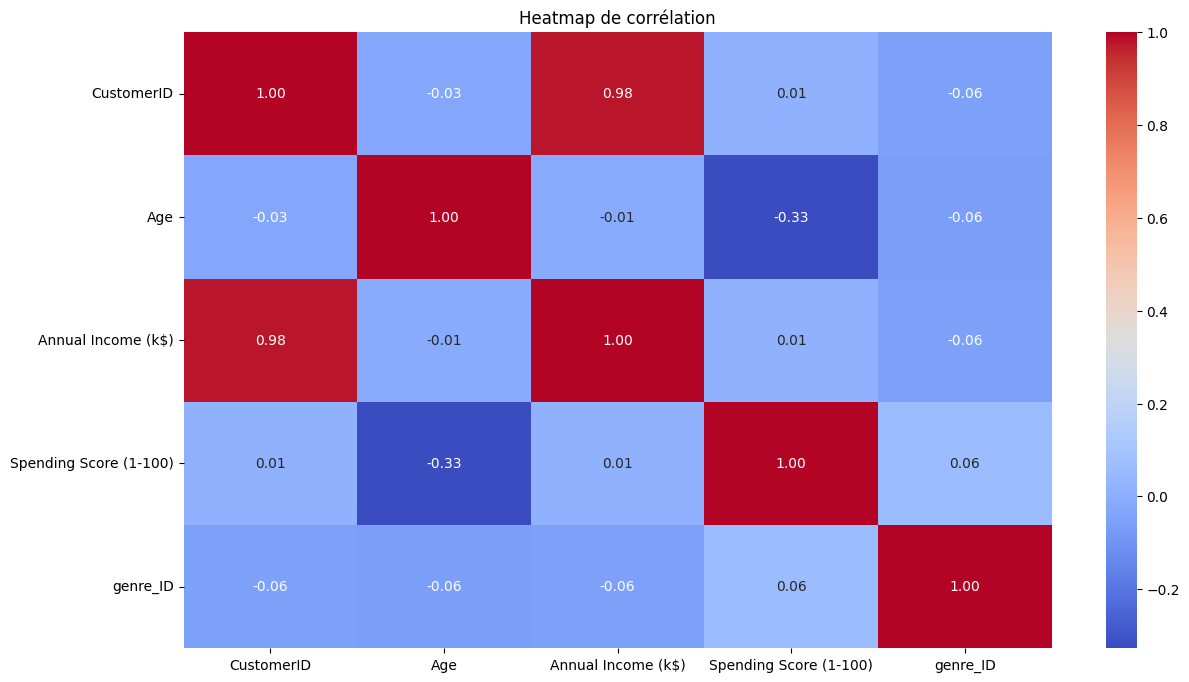

In [7]:
# L'ensemble des corrélation existantes
numeric_data = customers.select_dtypes(include=['number'])
martrix_corr = numeric_data.corr()

#Heatmap
plt.figure(figsize=(14,8))
sns.heatmap(martrix_corr, annot=True, fmt=".2f",cmap="coolwarm", cbar=True)
plt.title('Heatmap de corrélation')
plt.show()

# interprétation de la heatmap
- **CustomerID** à ignorer dans l'analyse, car il ne s'agit que d'un identifiant arbitraire. Sa forte corrélation avec Annual Income (k$) est simplement une conséquence du tri possible dans les données. Cette variable peut être exclue des visualisations et des analyses statistiques.
  
- **Age et Spending Score (-0.33)**
Cette corrélation négative modérée signifie que les clients plus âgés ont tendance à moins dépenser. Une segmentation par tranche d'âge pourrait montrer des profils de consommation spécifiques pour chaque catégorie.

- **Annual Income (k$) et Spending Score (0.01)**
L'absence de relation notable indique qu'un revenu élevé n'entraîne pas forcément une augmentation du score de dépense. Cette absence de lien peut montrer une hétérogénéité des comportements de consommation, quelle que soit la capacité financière.
Genre (genre_ID)

- Les corrélations très faibles (toutes proches de zéro) montrent que le genre n'a pas d'influence significative sur les autres variables (Age, Annual Income (k$), et Spending Score). Cette observation suggère que les dépenses et les revenus sont similaires entre hommes et femmes.

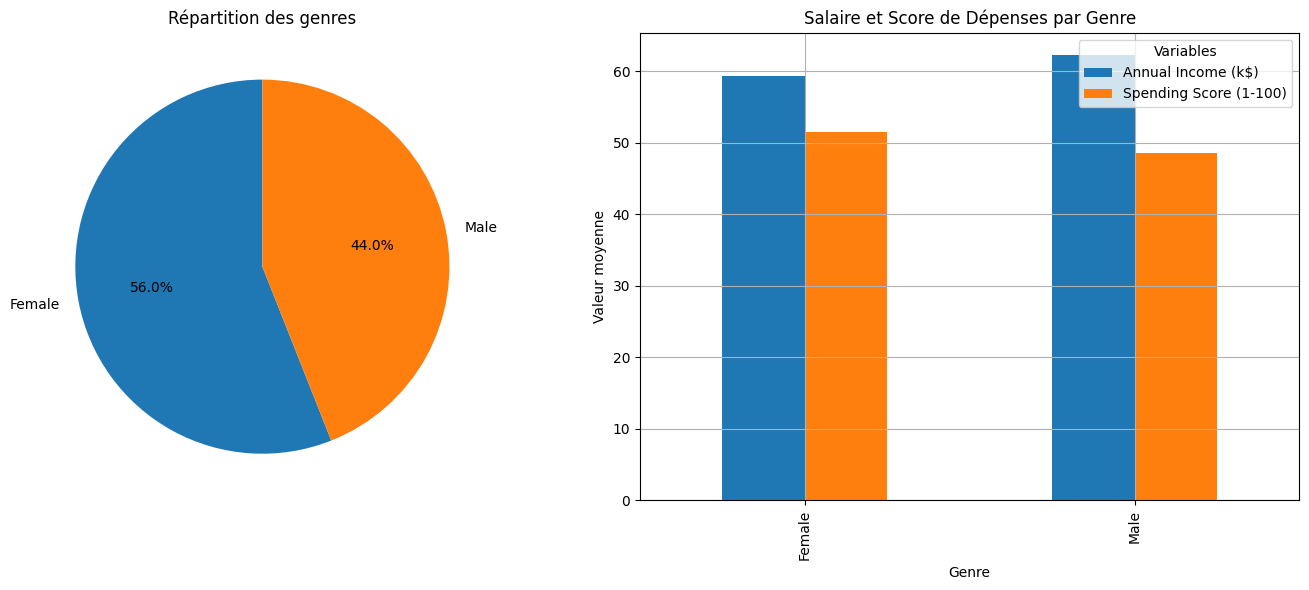

In [8]:
# Configuration de la figure
fig, axes = plt.subplots(1, 2, figsize=(14, 6))  # 1 ligne, 2 colonnes

# Premier graphique : Créer un diagramme en cercle pour la répartition par genre
genre_count = customers['Genre'].value_counts()
axes[0].pie(genre_count, labels=genre_count.index, autopct='%1.1f%%', startangle=90)
axes[0].set_title('Répartition des genres')

# Deuxième graphique : Créer un graphique en barre avec des couleurs différentes pour chaque colonne
# Calculer la moyenne du salaire et du score de dépenses par genre
genre_group = customers.groupby('Genre')[['Annual Income (k$)', 'Spending Score (1-100)']].mean()
genre_group.plot(kind='bar', ax=axes[1])

# Ajouter un titre pour le deuxième graphique
axes[1].set_title('Salaire et Score de Dépenses par Genre')

# Ajouter des labels aux axes
axes[1].set_xlabel('Genre')
axes[1].set_ylabel('Valeur moyenne')

# Ajouter une légende
axes[1].legend(title='Variables')
axes[1].grid()
# Ajuster l'espacement entre les graphiques
plt.tight_layout()

# Afficher la figure
plt.show()


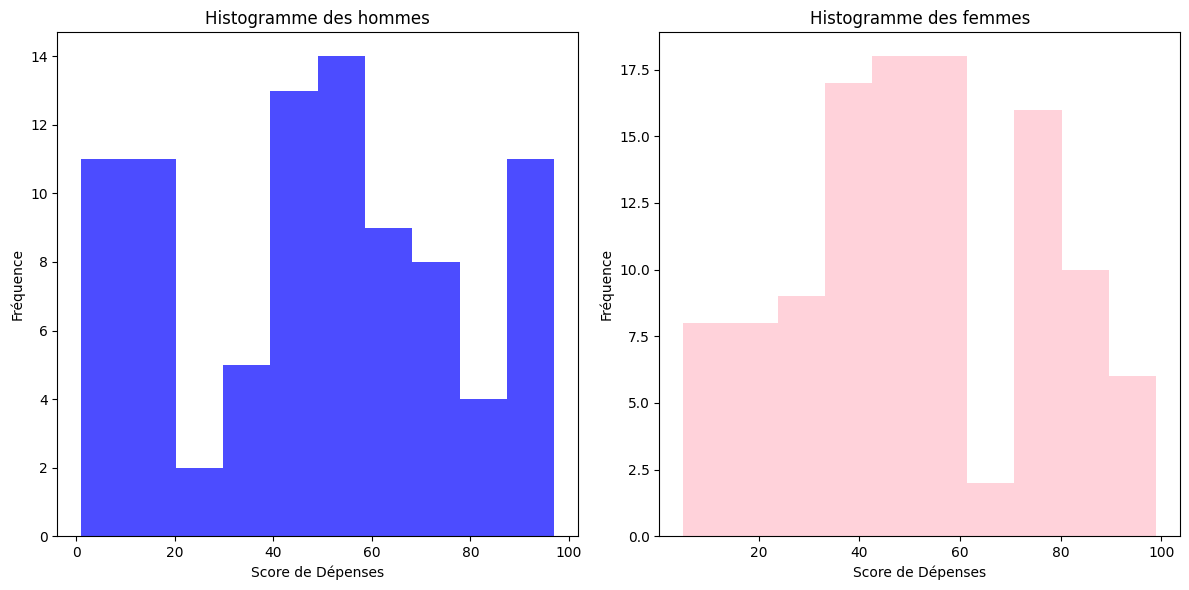

Test de Shapiro-Wilk pour les hommes :  ShapiroResult(statistic=np.float64(0.9521823927559212), pvalue=np.float64(0.00262746778155485))
Test de Shapiro-Wilk pour les femmes :  ShapiroResult(statistic=np.float64(0.9743800118526406), pvalue=np.float64(0.029766330851635908))


In [9]:
from scipy import stats
# Histogramme des scores de dépenses pour les hommes et les femmes
customers_men = customers[customers['Genre'] == 'Male']['Spending Score (1-100)']
customers_women = customers[customers['Genre'] == 'Female']['Spending Score (1-100)']

plt.figure(figsize=(12, 6))

# Histogramme des hommes
plt.subplot(1, 2, 1)
plt.hist(customers_men, bins=10, color='blue', alpha=0.7)
plt.title("Histogramme des hommes")
plt.xlabel('Score de Dépenses')
plt.ylabel('Fréquence')

# Histogramme des femmes
plt.subplot(1, 2, 2)
plt.hist(customers_women, bins=10, color='pink', alpha=0.7)
plt.title("Histogramme des femmes")
plt.xlabel('Score de Dépenses')
plt.ylabel('Fréquence')

plt.tight_layout()
plt.show()

# Test de normalité : Test de Shapiro-Wilk
shapiro_men = stats.shapiro(customers_men)
shapiro_women = stats.shapiro(customers_women)

print("Test de Shapiro-Wilk pour les hommes : ", shapiro_men)
print("Test de Shapiro-Wilk pour les femmes : ", shapiro_women)


In [10]:
# Test de Mann-Whitney pour comparer les distributions
u_stat, p_value_mw = stats.mannwhitneyu(customers_men, customers_women)

print("Statistique U de Mann-Whitney : ", u_stat)
print("Valeur p : ", p_value_mw)

# Interprétation
alpha = 0.05  # Niveau de significativité

if p_value_mw < alpha:
    print("Nous rejetons l'hypothèse nulle : il existe une différence significative entre les hommes et les femmes.")
else:
    print("Nous ne rejetons pas l'hypothèse nulle : il n'y a pas de différence significative.")


Statistique U de Mann-Whitney :  4697.5
Valeur p :  0.5712794188160656
Nous ne rejetons pas l'hypothèse nulle : il n'y a pas de différence significative.


- Bien que les femmes soient plus nombreuses dans cet échantillon et aient un score de dépenses moyen légèrement plus élevé (51.52 % contre 48.51 % pour les hommes), le test de Mann-Whitney indique qu'il n'existe pas de différence statistiquement significative entre les scores de dépenses des deux groupes (p-value = 0.571).
- Cela suggère que la différence observée pourrait être simplement due à la taille différente des groupes. Si les proportions de genre étaient égales, les résultats pourraient être différents. Nous ne pouvons donc pas conclure avec certitude que les femmes dépensent réellement plus que les hommes dans ce centre commercial.

In [11]:
# ajouter une colonne Age_Group
customers['Age_Group'] = None

# Attribuer les tranches d'âge
customers.loc[customers['Age'] < 30, 'Age_Group'] = 'Jeune'
customers.loc[(customers['Age'] >= 30) & (customers['Age'] < 60), 'Age_Group'] = 'Adulte'
customers.loc[customers['Age'] >= 60 , 'Age_Group'] = 'Senior'

In [12]:
customers

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),genre_ID,Age_Group
0,1,Male,19,15,39,1,Jeune
1,2,Male,21,15,81,1,Jeune
2,3,Female,20,16,6,2,Jeune
3,4,Female,23,16,77,2,Jeune
4,5,Female,31,17,40,2,Adulte
...,...,...,...,...,...,...,...
195,196,Female,35,120,79,2,Adulte
196,197,Female,45,126,28,2,Adulte
197,198,Male,32,126,74,1,Adulte
198,199,Male,32,137,18,1,Adulte


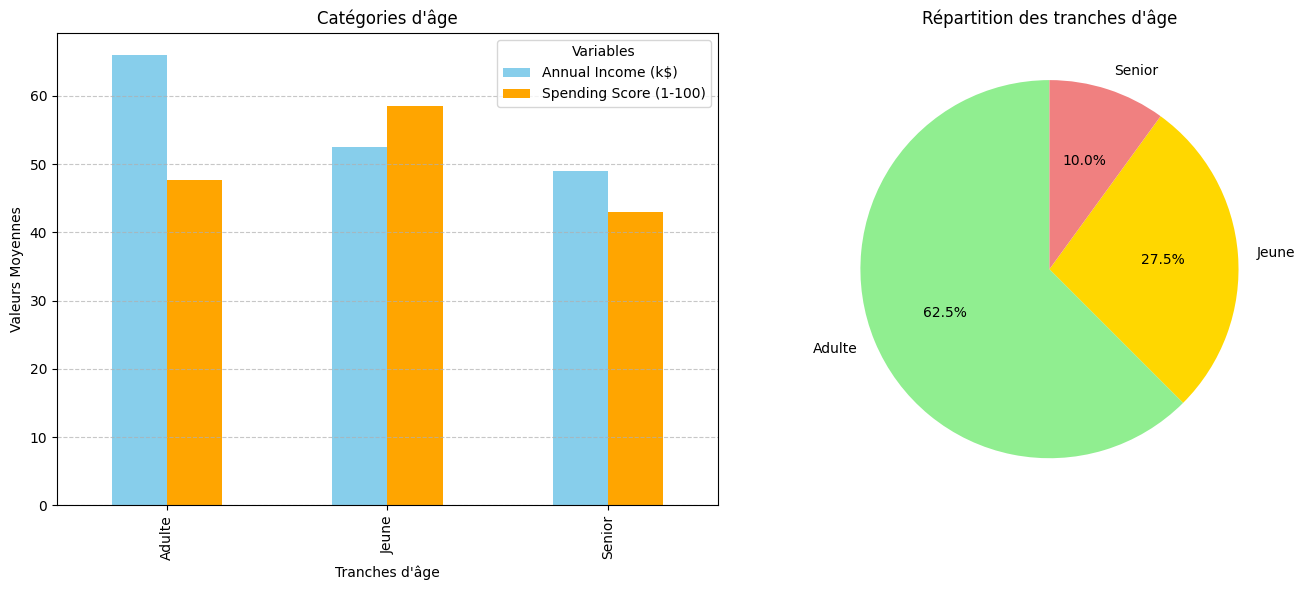

In [13]:
# Configuration de la figure
fig, axes = plt.subplots(1, 2, figsize=(14, 6))  # 1 ligne, 2 colonnes

# Premier graphique : Barres des moyennes par tranche d'âge
age_group = customers.groupby('Age_Group')[['Annual Income (k$)', 'Spending Score (1-100)']].mean()
age_group.plot(kind='bar', ax=axes[0], color=['skyblue', 'orange'])

# Ajouter un titre pour le premier graphique
axes[0].set_title("Catégories d'âge")

# Ajouter des labels aux axes
axes[0].set_xlabel("Tranches d'âge")
axes[0].set_ylabel('Valeurs Moyennes')

# Ajouter une légende
axes[0].legend(title='Variables')
axes[0].grid(axis='y', linestyle='--', alpha=0.7)

# Deuxième graphique : Diagramme circulaire des tranches d'âge
age_count = customers['Age_Group'].value_counts()
axes[1].pie(age_count, labels=age_count.index, autopct='%1.1f%%', startangle=90, colors=['lightgreen', 'gold', 'lightcoral'])
axes[1].set_title("Répartition des tranches d'âge")

# Ajuster l'espacement entre les graphiques
plt.tight_layout()

# Afficher la figure
plt.show()


In [14]:
Adult = customers[customers['Age_Group'] == 'Adulte']

In [15]:
# Diviser les scores de dépenses en tranches
score_bins = [0, 20, 40, 60, 80, 100]
score_labels = ['0-20', '21-40', '41-60', '61-80', '81-100']
Adult

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),genre_ID,Age_Group
4,5,Female,31,17,40,2,Adulte
6,7,Female,35,18,6,2,Adulte
9,10,Female,30,19,72,2,Adulte
11,12,Female,35,19,99,2,Adulte
12,13,Female,58,20,15,2,Adulte
...,...,...,...,...,...,...,...
195,196,Female,35,120,79,2,Adulte
196,197,Female,45,126,28,2,Adulte
197,198,Male,32,126,74,1,Adulte
198,199,Male,32,137,18,1,Adulte


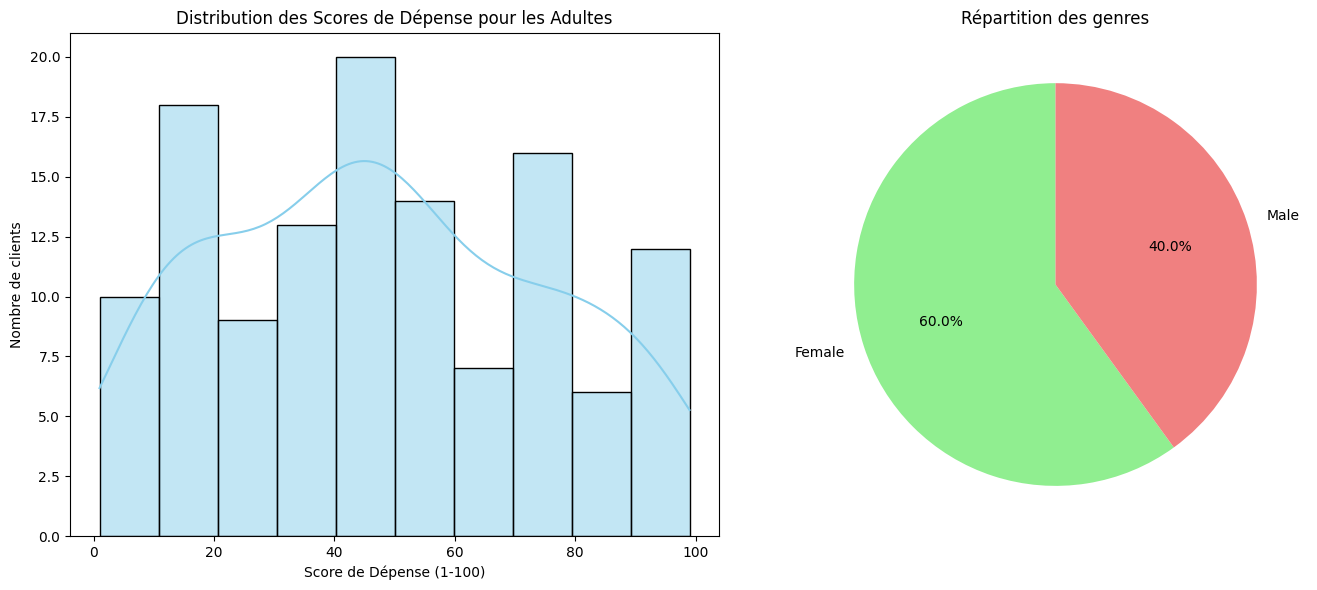

,Score Range,Genre Dominant
0,0-20,Male
1,21-40,Female
2,41-60,Female
3,61-80,Female
4,81-100,Female


In [30]:
# Configuration de la figure
fig, axes = plt.subplots(1, 2, figsize=(14, 6))  # Ajout des parenthèses manquantes pour figsize

# Utiliser .loc pour éviter le SettingWithCopyWarning
Adult.loc[:, 'Score Range'] = pd.cut(Adult['Spending Score (1-100)'], bins=score_bins, labels=score_labels)

# Pour éviter le FutureWarning, spécifier observed=False
genre_dominant_per_range_adult = Adult.groupby('Score Range', observed=False)['Genre'].agg(lambda x: x.value_counts().idxmax())

# Premier graphique : Distribution des scores de dépense avec genre dominant par tranche
axes[0].set_title('Distribution des Scores de Dépense pour les Adultes')
sns.histplot(Adult['Spending Score (1-100)'], bins=10, kde=True, color='skyblue', ax=axes[0])
axes[0].set_xlabel('Score de Dépense (1-100)')
axes[0].set_ylabel('Nombre de clients')

# Deuxième graphique : Diagramme circulaire des genres
age_count = Adult['Genre'].value_counts()
axes[1].pie(age_count, labels=age_count.index, autopct='%1.1f%%', startangle=90, colors=['lightgreen', 'lightcoral'])
axes[1].set_title("Répartition des genres")

plt.tight_layout()
plt.show()

# # Créer un tableau pour voir le genre dominant pour chaque tranche
tableau_genre_dominant_adult = pd.DataFrame({
    'Score Range': score_labels,
    'Genre Dominant': [genre_dominant_per_range_adult[score] for score in score_labels]
})

# Afficher le tableau
tableau_genre_dominant_adult

In [17]:
Jeune = customers[customers['Age_Group'] == 'Jeune']

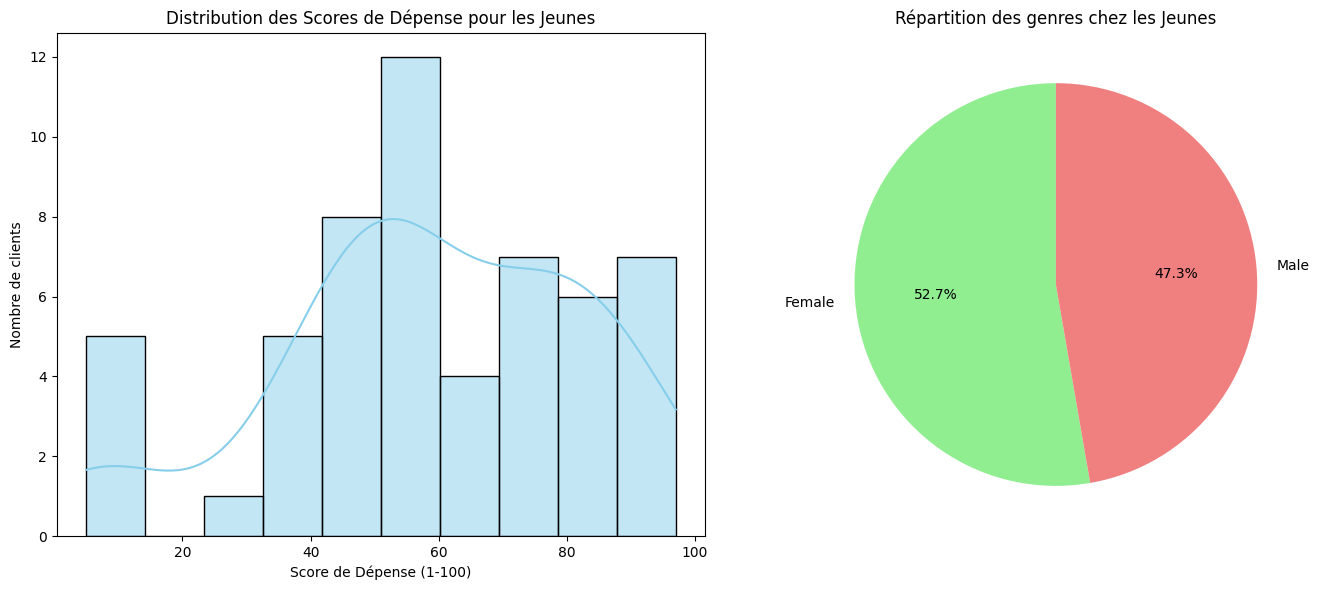

,Score Range,Genre Dominant
0,0-20,Male
1,21-40,Female
2,41-60,Female
3,61-80,Female
4,81-100,Female


In [29]:
# Configuration de la figure
fig, axes = plt.subplots(1, 2, figsize=(14, 6))  # 1 ligne, 2 colonnes

# Découpage en tranches de scores
Jeune.loc[:, 'Score Range'] = pd.cut(Jeune['Spending Score (1-100)'], bins=score_bins, labels=score_labels)

# Calcul du genre dominant par tranche de score
genre_dominant_per_range = Jeune.groupby('Score Range', observed=False)['Genre'].agg(lambda x: x.value_counts().idxmax())

# Premier graphique : distribution des scores de dépense
sns.histplot(Jeune['Spending Score (1-100)'], bins=10, kde=True, color='skyblue', ax=axes[0])
axes[0].set_title('Distribution des Scores de Dépense pour les Jeunes')
axes[0].set_xlabel('Score de Dépense (1-100)')
axes[0].set_ylabel('Nombre de clients')

# Deuxième graphique : diagramme circulaire des genres
genre_count = Jeune['Genre'].value_counts()
axes[1].pie(genre_count, labels=genre_count.index, autopct='%1.1f%%', startangle=90, colors=['lightgreen', 'lightcoral'])
axes[1].set_title("Répartition des genres chez les Jeunes")

plt.tight_layout()
plt.show()


# Créer un tableau pour voir le genre dominant pour chaque tranche
tableau_genre_dominant = pd.DataFrame({
    'Score Range': score_labels,
    'Genre Dominant':[genre_dominant_per_range[score] for score in score_labels]
})
tableau_genre_dominant

In [19]:
senior = customers[customers['Age_Group'] == 'Senior']

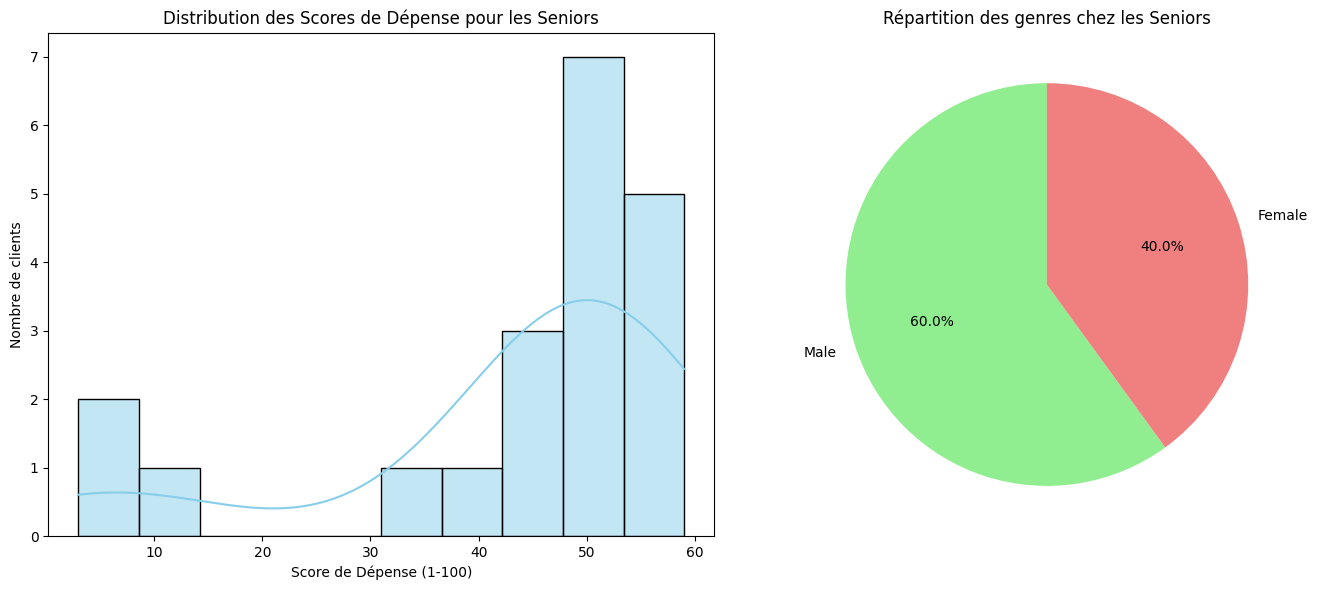

,Score Range,Genre Dominant
0,0-20,Male
1,21-40,Female
2,41-60,Male


In [32]:
# Si les seniors n'ont pas de scores supérieurs à 60, définissons les bins et les labels adaptés
score_bins_senior = [0, 20, 40, 60]  # Exemple, ajuster selon tes données réelles
score_labels_senior = ['0-20', '21-40', '41-60']

# Découpage en tranches de scores pour les seniors
senior.loc[:, 'Score Range'] = pd.cut(senior['Spending Score (1-100)'], bins=score_bins_senior, labels=score_labels_senior)

# Calcul du genre dominant par tranche de score pour les seniors
genre_dominant_per_range_senior = senior.groupby('Score Range', observed=False)['Genre'].agg(
    lambda x: x.value_counts().idxmax() if not x.empty else "Aucun"
)

# Configuration de la figure
fig, axes = plt.subplots(1, 2, figsize=(14, 6))  # 1 ligne, 2 colonnes

# Premier graphique : distribution des scores de dépense avec annotations
sns.histplot(senior['Spending Score (1-100)'], bins=10, kde=True, color='skyblue', ax=axes[0])
axes[0].set_title('Distribution des Scores de Dépense pour les Seniors')
axes[0].set_xlabel('Score de Dépense (1-100)')
axes[0].set_ylabel('Nombre de clients')


# Deuxième graphique : diagramme circulaire des genres
genre_count = senior['Genre'].value_counts()
axes[1].pie(genre_count, labels=genre_count.index, autopct='%1.1f%%', startangle=90, colors=['lightgreen', 'lightcoral'])
axes[1].set_title("Répartition des genres chez les Seniors")

plt.tight_layout()
plt.show()
    
# Créer un tableau pour voir le genre dominant pour chaque tranche
tableau_genre_dominant_senior = pd.DataFrame({
    'Score Range': score_labels_senior,
    'Genre Dominant': [genre_dominant_per_range_senior[score] for score in score_labels_senior]
})

# Afficher le tableau
tableau_genre_dominant_senior


In [40]:
# Test de Shapiro-Wilk pour chaque groupe pour voir si les donnés suivent une distribution normale 
young_spending = Jeune['Spending Score (1-100)']
adult_spending = Adult['Spending Score (1-100)']
senior_spending = senior['Spending Score (1-100)']

shapiro_young = stats.shapiro(young_spending)
shapiro_adult = stats.shapiro(adult_spending)
shapiro_senior = stats.shapiro(senior_spending)

print("P-value pour jeunes :", shapiro_young.pvalue)
print("P-value pour adultes :", shapiro_adult.pvalue)
print("P-value pour seniors :", shapiro_senior.pvalue)

P-value pour jeunes : 0.0195026603711243
P-value pour adultes : 0.0012073806946094926
P-value pour seniors : 0.00018746512729737018


- Donc les differents group ne suivent pas une distrubution normale , donc on peut pas utiliser le test ANOVA on utiliser le test de kruskal

In [41]:
from scipy.stats import kruskal

# Appliquer le test de Kruskal-Wallis
stat, p_value = kruskal(young_spending, adult_spending, senior_spending)

print(f"Statistique de test : {stat}")
print(f"P-value : {p_value}")

# Interprétation
if p_value < 0.05:
    print("Il existe une différence statistiquement significative entre les groupes.")
else:
    print("Il n'y a pas de différence statistiquement significative entre les groupes.")


Statistique de test : 8.87889244480353
P-value : 0.01180247265531593
Il existe une différence statistiquement significative entre les groupes.


In [44]:
from scipy.stats import rankdata
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# Rassembler les données
all_spending = np.concatenate([young_spending, adult_spending, senior_spending])
group_labels = ['Jeunes'] * len(young_spending) + ['Adultes'] * len(adult_spending) + ['Seniors'] * len(senior_spending)

# Appliquer le test de Dunn (ou Tukey HSD si les conditions le permettent)
comp = pairwise_tukeyhsd(all_spending, group_labels)
print(comp)


 Multiple Comparison of Means - Tukey HSD, FWER=0.05  
 group1  group2 meandiff p-adj   lower   upper  reject
------------------------------------------------------
Adultes  Jeunes  10.9178 0.0231   1.2157  20.62   True
Adultes Seniors   -4.664 0.7263 -19.1045 9.7765  False
 Jeunes Seniors -15.5818 0.0514 -31.2386 0.0749  False
------------------------------------------------------


### Les résultats du test de Tukey HSD montrent les comparaisons entre les groupes :

- Comparaison entre les adultes et les jeunes : La différence de moyenne est de 10.92, avec une p-value de 0.0231, ce qui est inférieur à 0.05. Cela indique une différence statistiquement significative entre ces deux groupes. Vous pouvez rejeter l'hypothèse nulle ici et conclure qu'il existe une différence significative entre les dépenses des adultes et des jeunes.

- Comparaison entre les adultes et les seniors : La différence de moyenne est de -4.66, avec une p-value de 0.7263, ce qui est supérieur à 0.05. Cela suggère qu'il n'y a pas de différence statistiquement significative entre les dépenses des adultes et des seniors.

- Comparaison entre les jeunes et les seniors : La différence de moyenne est de -15.58, avec une p-value de 0.0514, qui est très proche de 0.05. Bien que cela ne soit pas statistiquement significatif (p-value supérieure à 0.05), il est intéressant de noter que cette différence est presque significative.

### En résumé :
- La différence entre les adultes et les jeunes est significative.
Il n'y a pas de différence significative entre les adultes et les seniors ni entre les jeunes et les seniors (même si cette dernière comparaison est proche de la limite de signification).

# Insight

- Il n'existe pas de relation significative entre le revenu annuel et le score de dépenses, les analyses montrent que le score de dépenses est indépendant du revenu.
- L'âge et le sexe influencent le comportement de consommation :
  - Les jeunes (<30 ans) dépensent le plus malgré un revenu annuel moyen.
  - Le genre féminin domine les scores de dépense dans toutes les catégories sauf chez les seniors, où les hommes affichent le score le plus élevé dans l'intervalle [41 à 60].
- La catégorie adulte (30 à 59 ans) représente la majorité des clients (62.5%, avec 60% de femmes et 40% d'hommes). Ils ont les salaires les plus élevés mais présentent un score de dépense moyen de 50.
- Les hommes ont tendance à dépenser davantage lorsqu'ils sont jeunes : ils représentent 47.3% des jeunes mais cèdent la domination du score de dépense au genre féminin dans toutes les catégories, à l'exception des seniors.